# Russian Twitter Influence on the United States

#### Team Name: 
Team Good Luck in Theater (Group 047)

### Team Members:
- Yimeng Yang (A13643478)
    - Github ID: yimengyang
- Jarek Lu (A14106974)
    - Github ID: kyrielight
- Tony Huang (A13024096)
    - Github ID: toh006
- Raya Kavosh (A14826756)
    - Github ID: rakavosh
- Waylon Chang (A13929238)
     - Github ID: waychang626
- Ricky Martin (A13810245)
    - Github ID: rickym7205

## 1. Introduction

### Overview

- Russian bots were active on Twitter conducting misinformation campaigns starting at the very latest when the United States 2016 Elections were in session.
- In preparation for upcoming elections, Twitter released an archive of the Tweets used in the campaigns.
- Seeing this data, we were curious on how (at a subject level) Russia conducted this campaign.
- Using various statistical techniques, we found that there were no strong high-level correlations in account activity, but instead smaller, weaker correlations at lower levels, *which may be how Russia hid their campaign.*

### Background

Since 2015, it became evident to United States security officials that Russia had engaged in an information manipulation campaign to influence, amongst other things, the United States Federal and State elections. One way they achieved this was through the usage of a coordinated bot network on Twitter to influence potential voters through messages. 

After the ordeal, a large portion of the tweets used in the influence campaign were archived and released for independent research. Some of this research includes attempting to see if there are designs that can categorize Tweet content into [discrete types](http://pwarren.people.clemson.edu/Linvill_Warren_TrollFactory.pdf), or to make other somewhat [surface-level findings](https://www.vox.com/2018/10/19/17990946/twitter-russian-trolls-bots-election-tampering), but not focusing on how specifically Russia conducted a misinformation campaign globally and domestically. 

### Research Question

We are interested in seeing how Russia coordinated an Twitter-bot based influence campaign in the United States (using English Tweets). More specifically, **we are interested in determining if there was some kind of correlation of account details/activity with respect to subject terms embedded in tweets**, such as tweets that were about "Hillary Clinton". To do so, we looked for correlations between top subjects in tweets, and then dove deeper into sub-sets of the Tweets classified by further filters, such as accounts from Russia that were either "Left" or "Right" leaning. Finally, using this data, we also experimented with building a NLP model that can classify tweets as being leftist or rightist.

### Hypothesis

We predict that more popular accounts will use a higher frequency of key subject terms, such as "Trump" and "Hilary" in their tweets, as well as send out tweets at a higher frequency. 

With respect to the overall timeline, we expect that we will find subject popularity heavily dependent on time. For example, "Trump" may be a popular topic overall, but the names of individuals involved in the large amount of domestic mass shootings in 2018 may spike during their overall event time ranges.

We think that we can use number of followers or updates to measure influence of a tweet. Although there can be limitation to the accurcy of this measurement as there can be a lot of fake followers and updates. We predict that there is some correlation between followers and the account_type for tweets. We predict that there will be about the same distribution for left and right as the tweet bots can be trying to polarize the public opinions.

We expect to find high concentrations of targeted tweets revolving around popular political topics around the time the tweets were posted, as well as tweets discussing topics such as Presidential Candidates, gun control, religion, abortion laws, governing economic ideologies, or any timely partisan issue. The majority of these tweets will most probably occur in relation to major global events, amongst others, such as the United States Presidential Election of 2016, the United Kingdom’s decision to withdraw from the European Union, and the Net Neutrality debate of 2018.
We also expect to find direct correlation between types of accounts and the material posted by said accounts. For example we expect left sided accounts to tweet or retweet very leftist posts. This would make sense given the influence these specific accounts wish to achieve.


## 2. Dataset(s)

### Dataset Name: Russian Troll Tweet
#### Dataset Link: 
The dataset we used can be found [here](https://github.com/fivethirtyeight/russian-troll-tweets).
It contains 3 million Russian bot tweets, where each row is a tweet.

#### Size of Dataset: 
This dataset consists of over three million tweets made by these Russian Twitter bot accounts as cotegorized by Twitter. Each row includes the tweet as well as other information regarding the tweet such as time posted, number of likes/retweets, twitter handle of the account that posted the tweet, etc.

The files have the following columns:

Header | Definition
---|---------
`external_author_id` | An author account ID from Twitter 
`author` | The handle sending the tweet
`content` | The text of the tweet
`region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?id=000199367&type=1)
`language` | The language of the tweet
`publish_date` | The date and time the tweet was sent
`harvested_date` | The date and time the tweet was collected by Social Studio
`following` | The number of accounts the handle was following at the time of the tweet
`followers` | The number of followers the handle had at the time of the tweet
`updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
`post_type` | Indicates if the tweet was a retweet or a quote-tweet
`account_type` | Specific account theme, as coded by Linvill and Warren
`retweet` | A binary indicator of whether or not the tweet is a retweet
`account_category` | General account theme, as coded by Linvill and Warren
`new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018
`alt_external_id` | Reconstruction of author account ID from Twitter, derived from `article_url` variable and the first list provided to Congress
`tweet_id` | Unique id assigned by twitter to each status update, derived from `article_url`
`article_url` | Link to original tweet. Now redirects to "Account Suspended" page
`tco1_step1` | First redirect for the first http(s)://t.co/ link in a tweet, if it exists
`tco2_step1` | First redirect for the second http(s)://t.co/ link in a tweet, if it exists
`tco3_step1` | First redirect for the third http(s)://t.co/ link in a tweet, if it exists

### Imports and Loading Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import collections
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns, numpy as np
import patsy

In [3]:
# Because the data is too large to submit on Github, we will download it here
! git clone "https://github.com/fivethirtyeight/russian-troll-tweets" data

Cloning into 'data'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Unpacking objects: 100% (80/80), done.
Checking out files: 100% (14/14), done.


In [6]:
import glob
file_paths = glob.glob('./data/*')
tweet_type_per_file={}
frames = []
for i, p in enumerate(file_paths):
    # If we want to read fewer files, uncomment this line
    #if i > 1:
    #    break
    tweets = pd.read_csv(p)
    frames.append(tweets)
big_frame = pd.concat(frames)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Store the big_frame object into a tweets object, so we can always reference big_frame without reloading everything.
tweets = big_frame
tweets.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,2495567768,DAILYSANFRAN,Police: Airline pilot found passed out in cock...,United States,English,1/2/2017 14:39,1/2/2017 14:39,4577,16782,34960,...,local,0,NewsFeed,0,2495567768,815930489311789056,http://twitter.com/2495567768/statuses/8159304...,https://twitter.com/DailySanFran/status/815930...,http://kron4.com/2017/01/02/police-airline-pil...,NaN
1,2495567768,DAILYSANFRAN,Dashcam video shows man launching himself onto...,United States,English,1/2/2017 15:39,1/2/2017 15:39,4577,16782,34961,...,local,0,NewsFeed,0,2495567768,815945595546431488,http://twitter.com/2495567768/statuses/8159455...,https://twitter.com/DailySanFran/status/815945...,http://kron4.com/2017/01/02/dashcam-video-show...,NaN
2,2495567768,DAILYSANFRAN,Man Arrested For Setting Fire To South SF Medi...,United States,English,1/2/2017 16:19,1/2/2017 16:19,4577,16782,34962,...,local,0,NewsFeed,0,2495567768,815955659963432960,http://twitter.com/2495567768/statuses/8159556...,https://twitter.com/DailySanFran/status/815955...,http://sanfrancisco.cbslocal.com/2017/01/02/ma...,NaN
3,2495567768,DAILYSANFRAN,Practical tips to achieving your New Year's re...,United States,English,1/2/2017 16:29,1/2/2017 16:29,4577,16782,34963,...,local,0,NewsFeed,0,2495567768,815958175593730049,http://twitter.com/2495567768/statuses/8159581...,https://twitter.com/DailySanFran/status/815958...,http://abc7news.com/society/practical-tips-to-...,NaN
4,2495567768,DAILYSANFRAN,Couple disappears during trip to Big Sur https...,United States,English,1/2/2017 16:39,1/2/2017 16:39,4577,16781,34964,...,local,0,NewsFeed,0,2495567768,815960697800626176,http://twitter.com/2495567768/statuses/8159606...,https://twitter.com/DailySanFran/status/815960...,http://kron4.com/2017/01/02/couple-disappears-...,NaN


## 3. Data Analysis

### Data Cleaning 

#### I. Filter out only English tweets and tweets in United States
For the purposes of this study, we are only interested in English-language tweets that occured in the "United States" region.

In [4]:
english_tweets = tweets[(tweets['language']=='English') & (tweets['region']=="United States")]

#### II. Lowercase all content
Next, we want to reduce all the content of the Tweets into lower-case. We initially observed that capitalization of topics (when used in similar contexts) was inconsistent.

In [5]:
def clean_data(tweets):
    """ Lowercase all contents
    """
    tweets['content'] = tweets['content'].str.lower()

In [6]:
clean_data(english_tweets)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### III. Provide a visualization of the data to help improve comprehension

##### Helper functions for visualization

In [7]:
def plot_account(tweets):
    """ Plot different type of account activity over time
    """
    tweets['Right_count'] = tweets.apply(lambda x: 1 if x['account_type'] == 'Right' else 0, axis=1)
    tweets['Left_count'] = tweets.apply(lambda x: 1 if x['account_type'] == 'Left' else 0, axis=1)
    tweets['RightTroll_count'] = tweets.apply(lambda x: 1 if x['account_category'] == 'RightTroll' else 0, axis=1)
    tweets['LeftTroll_count'] = tweets.apply(lambda x: 1 if x['account_category'] == 'LeftTroll' else 0, axis=1)
    tweets[['Right_count']].resample('M').sum().plot()  
    tweets[['Left_count']].resample('M').sum().plot()
    tweets[['RightTroll_count']].resample('M').sum().plot()
    tweets[['LeftTroll_count']].resample('M').sum().plot()

##### Plot tweet frequencies over time

In [8]:
english_tweets.index = pd.to_datetime(english_tweets["publish_date"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Resample by Day')

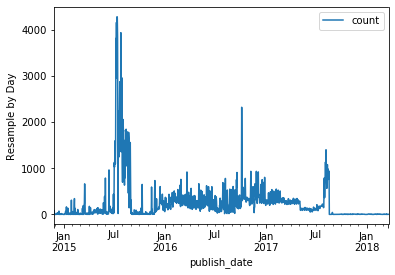

In [9]:
english_tweets['count'] = [1] * len(english_tweets)
english_tweets[['count']].resample('D').sum().plot().set_ylabel('Resample by Day')

Text(0, 0.5, 'Resample by Week')

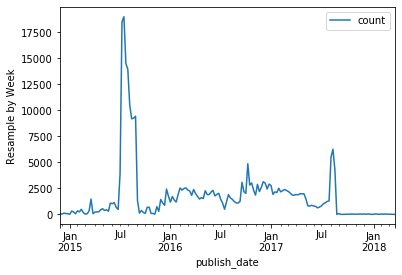

In [10]:
english_tweets[['count']].resample('W').sum().plot().set_ylabel('Resample by Week')


Text(0, 0.5, 'Resample by Month')

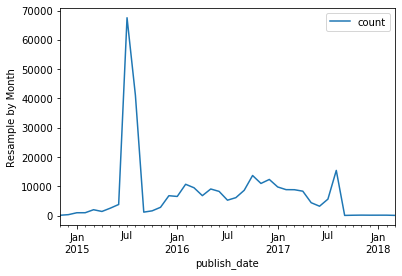

In [11]:
english_tweets[['count']].resample('M').sum().plot().set_ylabel('Resample by Month')

##### Plot account_type activity over time

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

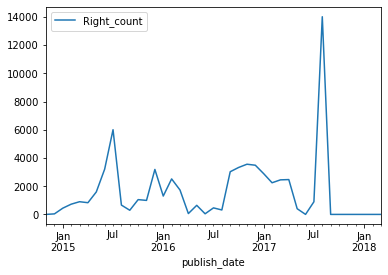

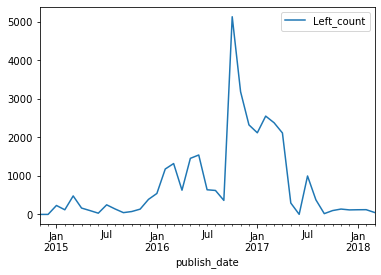

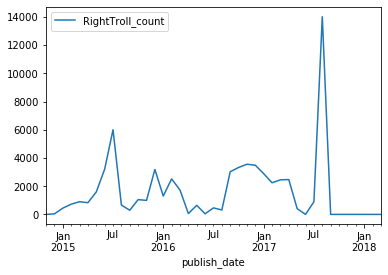

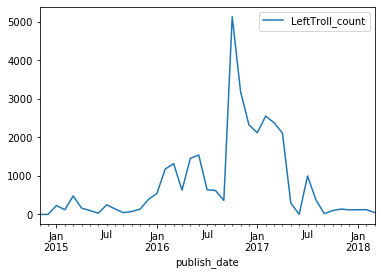

In [12]:
plot_account(english_tweets)

#### IV. Filter Tweets to those from 2016.6 to 2017.5

From our visualizations, we observed that the bulk of bot activity whose accounts were classified as either "Left" or "Right" (with respect to the United States political spectrum) occured between 2016.6 and 2017.5. Therefore, we will narrow down our data to that time period (we are only interested in Left/Right account, see next section).

In [13]:
tweets_2016_2017 = english_tweets[
    (
        (english_tweets.index.year == 2016) & (english_tweets.index.month >= 6)
    ) | (
        (english_tweets.index.year == 2017) & (english_tweets.index.month <= 5)
    )]

#### V. Focus on account_type Left and Right. 
We are only interested in Left/Right tweets, so we filtered out any Tweets whose accounts are not "Left" or "Right"

In [14]:
tweets_2016_2017 = tweets_2016_2017[(tweets_2016_2017['account_type']=='Left') | (tweets_2016_2017['account_type']=='Right')]

### Data Visualizations

#### Helper functions for visualization

In [15]:
def word_freq(tweets):
    """ Calculate word frequency for each word in the tweet contents
    """
    content_loc= tweets.columns.get_loc("content")
    words = []
    for i in range(len(tweets)):
        c = tweets.iloc[i, content_loc]
        if isinstance(c, str):
            words.append(c.lower().split(" "))
    words = list(itertools.chain(*words))
    counts= collections.Counter(words)
    return counts

In [16]:
# Some predefined filler_words that we want to filter out
filler_words = [
    '', 'to', 'in', 'the', 'of', 'for', 'your', 'my', 'his', 'all',
    'a','on','and','is','at','with','after','you','from','as','i',
    'by','be','says','are','this','that','not','over','it','will',
    'who','was','about','have','up','we','more','but','just','rt',
    'get', 'out', '-','&amp;','new', '&', 'they', 'so', 'if', 'an',
    'has', 'now', 'our', 'like', 'don\'t','i\'m', 'when', 'how',
    'their','he', 'me', 'no', 'has', 'it\'s', 'or', 'do', 'via',
    'why', 'want', 'us', 'her', 'she', 'can', 'need', 'because',
    'only', 'one', 'should', 'see', 'being', 'him', 'would', 'were',
    'those', 'during', 'know', 'been', 'some', 'day', 'then', 'than',
    'into', 'can\'t', 'still', 'there', 'years', 'got', 'say', 'you\'re',
    'them', 'most', 'it.', 'these', 'this.', 'never', 'what', 'found',
    'let', 'much', 'many',':', 'here', '2', 'may']

In [17]:
def plot_word_freq(tweets, year_start, year_end, month_start, month_end):
    num_month = 13 - month_start + month_end + (year_end - year_start - 1) * 12
    fig, ax = plt.subplots(num_month,1,figsize=(8, 32))
    count = 0
    
    for year in range(year_start,year_end+1):
        if year_start == year_end:
            month_range = range(month_start, month_end+1)
        elif year == year_start:
            month_range = range(month_start, 13)
        elif year == year_end:
            month_range = range(1, month_end+1)
        else:
            month_range = range(1,13)
            
        for month in month_range:
            counter = word_freq(
                tweets[
                    (tweets.index.year == year) &
                    (tweets.index.month == month)
                ]
            )
            for w in filler_words:
                del counter[w]
            freqs = counter.most_common(10)

            labels, values = zip(*freqs)

            indexes = np.arange(len(labels))
            width = 1

            ax[count].bar(indexes, values, width)
            rects = ax[count].patches
            ax[count].set_xlabel('top_words')
            ax[count].set_ylabel("{}-{}".format(year, month))
            
            for rect, label in zip(rects, labels):
                height = rect.get_height()
                ax[count].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom', rotation=45)
            count += 1

In [18]:
def word_freq_df(tweets, year_start, year_end, month_start, month_end, num=100):    
    d={}
    num_month = 13 - month_start + month_end + (year_end - year_start - 1) * 12 
    for year in range(year_start,year_end+1):
        if year_start == year_end:
            month_range = range(month_start, month_end+1)
        elif year == year_start:
            month_range = range(month_start, 13)
        elif year == year_end:
            month_range = range(1, month_end+1)
        else:
            month_range = range(1,13)
            
        for month in month_range:
            counter = word_freq(
                tweets[
                    (tweets.index.year == year) &
                    (tweets.index.month == month)
                ]
            )
            for w in filler_words:
                del counter[w]
            freqs = counter.most_common(num)
            datetime = "{}-{}".format(year, month)
            d[datetime] = freqs
    return pd.DataFrame.from_dict(d)

In [19]:
def plot_word_freq_by_word(tweets, word_count=10):
    counter = word_freq(
                tweets
            )
    for w in filler_words:
        del counter[w]
    freqs = counter.most_common(word_count)
    
    for w in freqs:
        w = w[0]
        col_name = '{}_count'.format(w)
        print(w)
        tweets[col_name] = tweets.apply(lambda x: 1 if x['content'].find(w) >= 0 else 0, axis=1)
        tweets[[col_name]].resample('M').sum().plot()  

#### Word frequency analysis
We will visualize most popular words for our interested dataset for Left or Right accounts only to see what each account type was trying to promote. Through this, we can observe what was trending in each subset.

##### I. Find the top words for the entire dataset (Left and Right)

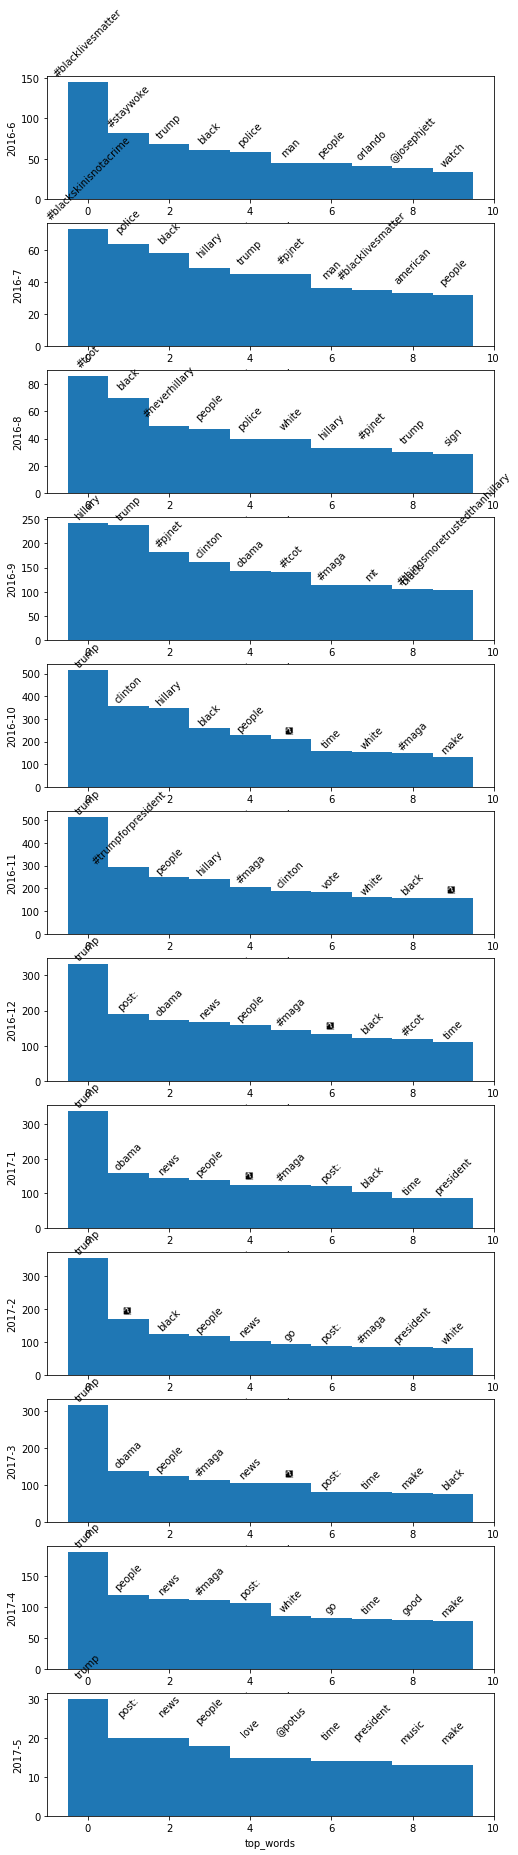

In [20]:
plot_word_freq(tweets_2016_2017, 2016, 2017, 6, 5)

- At a high level, most popular topics are pretty consistent with topics in America that tended to be most divided upon, such as Trump, Black Lives Matter, Hilary Clinton, police, and the US Presidency.
- One thing we can observe is a correlation of topics with current accounts. In our mid-2016 datasets, #blacklivesmatter was a trending topic from the Russian bots. The timing corresponds with a series of police shootings and protests in the same timeframe, including the shooting of Anton Sterling, Philando Castile, and the protests that were held afterwords - the more than 100 of them. The rest of the top topics also tend to correlate with popular, often divisive topics (while Trump was consistently promoted.
- This correlation is a strong suggestion that Russia's bots often coordinated their tweet content on a selective list of politically-dividing topics.

In [21]:
freq_table_all = word_freq_df(tweets_2016_2017, 2016, 2017, 6, 5)
freq_table_all.head(10)

,2016-6,2016-7,2016-8,2016-9,2016-10,2016-11,2016-12,2017-1,2017-2,2017-3,2017-4,2017-5
0,"(#blacklivesmatter, 145)","(#blackskinisnotacrime, 73)","(#tcot, 86)","(hillary, 242)","(trump, 515)","(trump, 512)","(trump, 332)","(trump, 338)","(trump, 354)","(trump, 317)","(trump, 189)","(trump, 30)"
1,"(#staywoke, 82)","(police, 64)","(black, 70)","(trump, 239)","(clinton, 357)","(#trumpforpresident, 292)","(post:, 190)","(obama, 158)","(�, 169)","(obama, 138)","(people, 119)","(post:, 20)"
2,"(trump, 68)","(black, 58)","(#neverhillary, 49)","(#pjnet, 183)","(hillary, 347)","(people, 249)","(obama, 174)","(news, 144)","(black, 124)","(people, 124)","(news, 113)","(news, 20)"
3,"(black, 61)","(hillary, 49)","(people, 47)","(clinton, 162)","(black, 259)","(hillary, 243)","(news, 167)","(people, 140)","(people, 117)","(#maga, 114)","(#maga, 112)","(people, 18)"
4,"(police, 58)","(trump, 45)","(police, 40)","(obama, 143)","(people, 229)","(#maga, 207)","(people, 159)","(�, 125)","(news, 104)","(news, 106)","(post:, 107)","(love, 15)"
5,"(man, 45)","(#pjnet, 45)","(white, 40)","(#tcot, 140)","(�, 211)","(clinton, 190)","(#maga, 145)","(#maga, 124)","(go, 93)","(�, 106)","(white, 85)","(@potus, 15)"
6,"(people, 44)","(man, 36)","(hillary, 33)","(#maga, 114)","(time, 159)","(vote, 186)","(�, 132)","(post:, 122)","(post:, 88)","(post:, 82)","(go, 82)","(time, 14)"
7,"(orlando, 41)","(#blacklivesmatter, 35)","(#pjnet, 33)","(mt, 113)","(white, 155)","(white, 161)","(black, 123)","(black, 105)","(#maga, 85)","(time, 81)","(time, 81)","(president, 14)"
8,"(@josephjett, 38)","(american, 33)","(trump, 30)","(black, 106)","(#maga, 148)","(black, 158)","(#tcot, 118)","(time, 87)","(president, 84)","(make, 79)","(good, 80)","(music, 13)"
9,"(watch, 33)","(people, 32)","(sign, 29)","(#thingsmoretrustedthanhillary, 104)","(make, 133)","(�, 157)","(time, 110)","(president, 87)","(white, 83)","(black, 77)","(make, 77)","(make, 13)"


##### II. Find what Leftist Russian accounts were promoting
```account_type: Left```

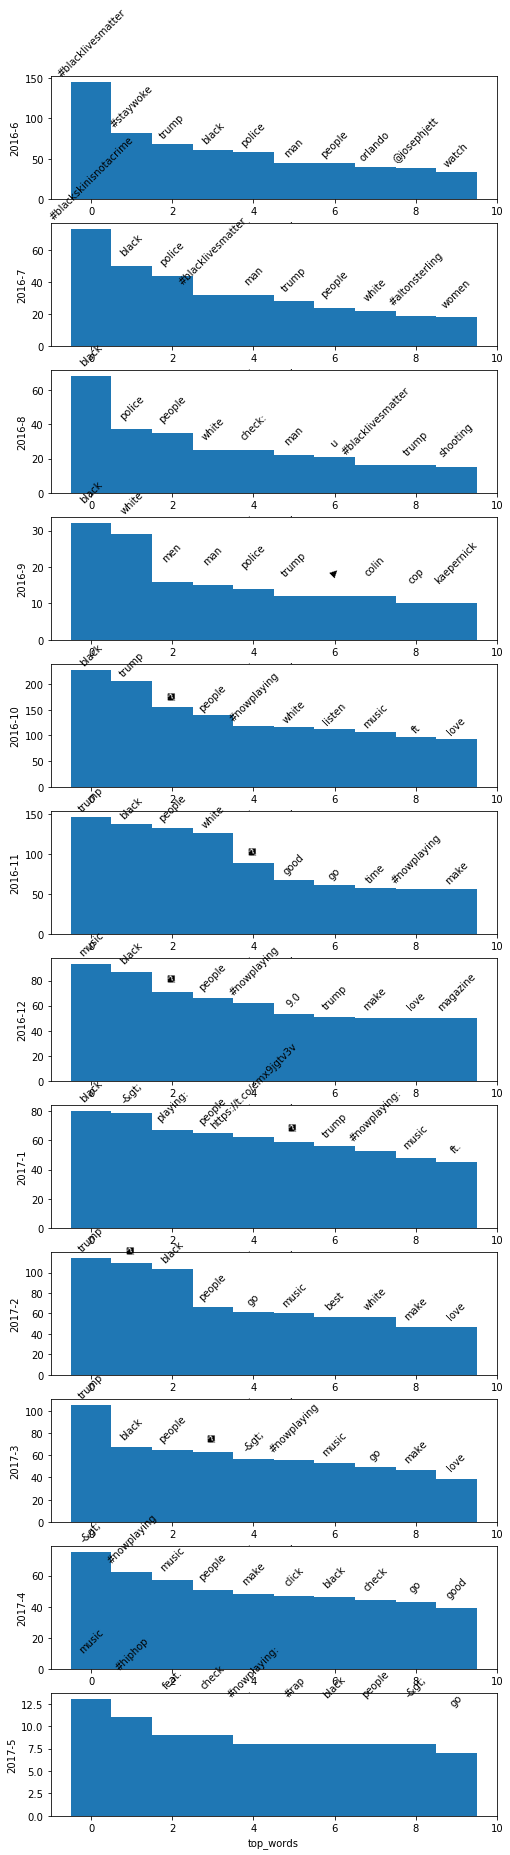

In [22]:
left = tweets_2016_2017[tweets_2016_2017['account_type'] == 'Left']
plot_word_freq(left, 2016, 2017, 6, 5)

- We can briefly observe that Leftist occused focused heavily on a smaller set of topics, such as Trump, racial tensions (black/white), police, and the people - topics that were popular in politically left-leaning conversations and outlets.

- This suggests to us that Russian accounts on the left increasingly attempted to sow discord within leftist communities. This implication could be supported by the findings we saw in the overall analysis - the prevalence of #blacklivesmatter-related topics, and even #trump could have been used to increase internal dissonance in leftists communities, making it harder for them to unite.

- One major observation is that the most popular topic was either #blacklivesmatter or otherwise related with African-Americans. "Trump", "people" and "police" were common seconds. Given the nature of "Trump" and "police" being topics usually not supported by African-American communities, this yet again suggests the leftist troll accounts were trying to sow discord specifically in African-American communities.

In [23]:
freq_table_left = word_freq_df(left, 2016, 2017, 6, 5)

In [24]:
freq_table_left.head(10)

,2016-6,2016-7,2016-8,2016-9,2016-10,2016-11,2016-12,2017-1,2017-2,2017-3,2017-4,2017-5
0,"(#blacklivesmatter, 145)","(#blackskinisnotacrime, 73)","(black, 68)","(black, 32)","(black, 227)","(trump, 146)","(music, 93)","(black, 80)","(trump, 114)","(trump, 105)","(-&gt;, 75)","(music, 13)"
1,"(#staywoke, 82)","(black, 50)","(police, 37)","(white, 29)","(trump, 206)","(black, 137)","(black, 87)","(-&gt;, 79)","(�, 109)","(black, 67)","(#nowplaying, 62)","(#hiphop, 11)"
2,"(trump, 68)","(police, 44)","(people, 35)","(men, 16)","(�, 156)","(people, 133)","(�, 71)","(playing:, 67)","(black, 103)","(people, 65)","(music, 57)","(feat., 9)"
3,"(black, 61)","(#blacklivesmatter, 32)","(white, 25)","(man, 15)","(people, 139)","(white, 126)","(people, 66)","(people, 65)","(people, 66)","(�, 63)","(people, 51)","(check, 9)"
4,"(police, 58)","(man, 32)","(check:, 25)","(police, 14)","(#nowplaying, 119)","(�, 89)","(#nowplaying, 62)","(https://t.co/emx9jgtv3v, 62)","(go, 61)","(-&gt;, 57)","(make, 48)","(#nowplaying:, 8)"
5,"(man, 45)","(trump, 28)","(man, 22)","(trump, 12)","(white, 117)","(good, 67)","(9.0, 53)","(�, 59)","(music, 60)","(#nowplaying, 56)","(click, 47)","(#rap, 8)"
6,"(people, 44)","(people, 24)","(u, 21)","(▶, 12)","(listen, 113)","(go, 61)","(trump, 51)","(trump, 56)","(best, 57)","(music, 53)","(black, 46)","(black, 8)"
7,"(orlando, 40)","(white, 22)","(#blacklivesmatter, 16)","(colin, 12)","(music, 106)","(time, 57)","(make, 50)","(#nowplaying:, 53)","(white, 57)","(go, 49)","(check, 44)","(people, 8)"
8,"(@josephjett, 38)","(#altonsterling, 19)","(trump, 16)","(cop, 10)","(ft, 97)","(#nowplaying, 56)","(love, 50)","(music, 48)","(make, 47)","(make, 47)","(go, 43)","(-&gt;, 8)"
9,"(watch, 33)","(women, 18)","(shooting, 15)","(kaepernick, 10)","(love, 93)","(make, 56)","(magazine, 50)","(ft., 45)","(love, 47)","(love, 39)","(good, 39)","(go, 7)"


##### III. Find what Rightist Russian accounts were promoting
```account_type: Right```

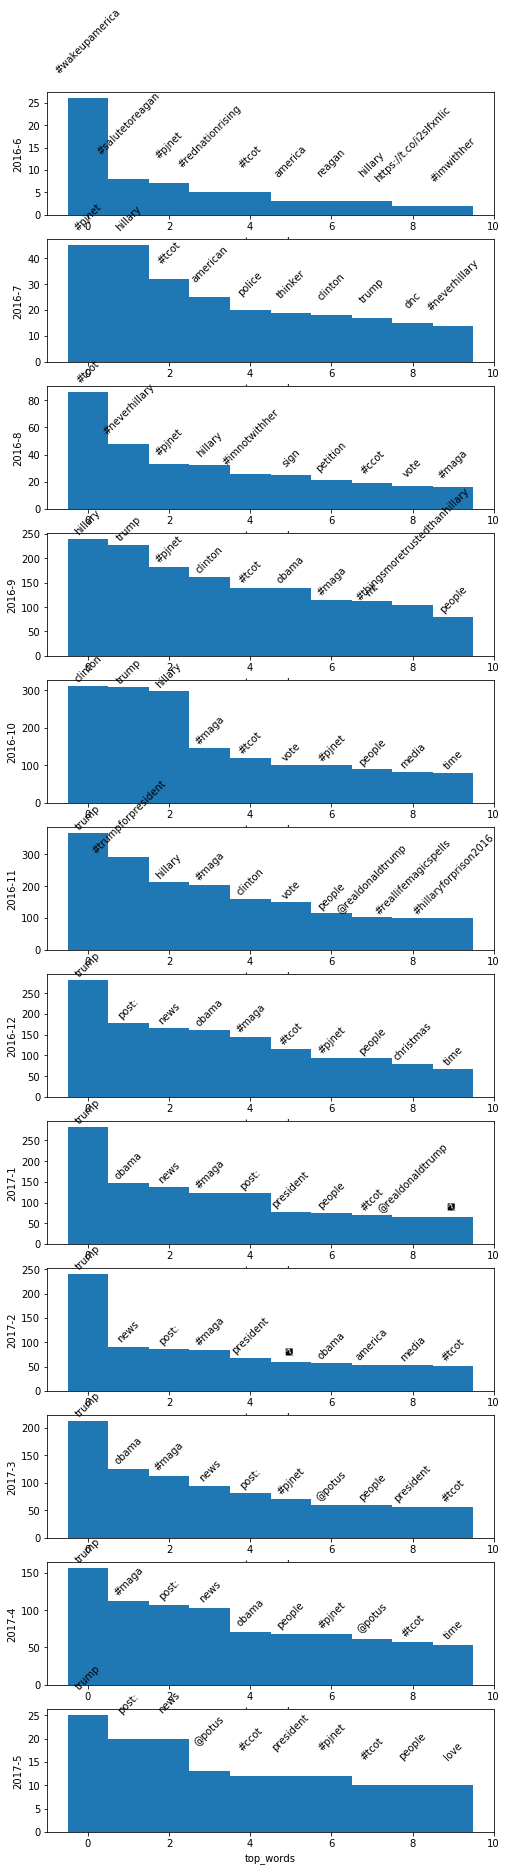

In [25]:
right = tweets_2016_2017[tweets_2016_2017['account_type'] == 'Right']
plot_word_freq(right, 2016, 2017, 6, 5)

- Meanwhile, we observed that right-leaning Russian accounts seemed to be more engaged in talking about Trump, Obama, Clinton (emails), #maga. There were also references to "fake" (fake news), and James Comey (widely considered a traitor by the Political Right), and even fear-mongering topics.

- Unlike leftist tweets, rightist tweets tended to push on the continued narrative that right-leaning parties were being oppressed, and also to some degree attempted to increase fear in the right against the left, and to some degree, maybe even unite right-leaning voters using fear-mongering tactics. While leftist accounts were relatively close in the topics they tweeted on, the rightist accounts overwhelmingly tweeted about Trump (presumably in a positive fashion).

- We believe that Russia's overall tactic, as seen thus far, was to split the left-leaning voting communities, while uniting right-leaning communities: "Trump" as a topic was overwhelmingly popular with the rightist accounts, and the second topics were always about the "fear-mongering" topics. This difference suggests a heavier focus on uniting the right, and only using fear tactics when necessary (perhaps to convince on the edge voters).

In [26]:
freq_table_right = word_freq_df(right, 2016, 2017, 6, 5)

In [27]:
freq_table_right.head(10)

,2016-6,2016-7,2016-8,2016-9,2016-10,2016-11,2016-12,2017-1,2017-2,2017-3,2017-4,2017-5
0,"(#wakeupamerica, 26)","(#pjnet, 45)","(#tcot, 86)","(hillary, 239)","(clinton, 311)","(trump, 366)","(trump, 281)","(trump, 282)","(trump, 240)","(trump, 212)","(trump, 156)","(trump, 25)"
1,"(#salutetoreagan, 8)","(hillary, 45)","(#neverhillary, 48)","(trump, 227)","(trump, 309)","(#trumpforpresident, 292)","(post:, 179)","(obama, 146)","(news, 91)","(obama, 125)","(#maga, 112)","(post:, 20)"
2,"(#pjnet, 7)","(#tcot, 32)","(#pjnet, 33)","(#pjnet, 183)","(hillary, 298)","(hillary, 212)","(news, 165)","(news, 138)","(post:, 86)","(#maga, 113)","(post:, 107)","(news, 20)"
3,"(#rednationrising, 5)","(american, 25)","(hillary, 32)","(clinton, 161)","(#maga, 146)","(#maga, 205)","(obama, 161)","(#maga, 123)","(#maga, 85)","(news, 95)","(news, 103)","(@potus, 13)"
4,"(#tcot, 5)","(police, 20)","(#imnotwithher, 26)","(#tcot, 140)","(#tcot, 120)","(clinton, 161)","(#maga, 145)","(post:, 122)","(president, 67)","(post:, 81)","(obama, 71)","(#ccot, 12)"
5,"(america, 3)","(thinker, 19)","(sign, 25)","(obama, 140)","(vote, 101)","(vote, 150)","(#tcot, 115)","(president, 78)","(�, 60)","(#pjnet, 71)","(people, 68)","(president, 12)"
6,"(reagan, 3)","(clinton, 18)","(petition, 21)","(#maga, 114)","(#pjnet, 101)","(people, 116)","(#pjnet, 94)","(people, 75)","(obama, 57)","(@potus, 59)","(#pjnet, 68)","(#pjnet, 12)"
7,"(hillary, 3)","(trump, 17)","(#ccot, 19)","(mt, 113)","(people, 90)","(@realdonaldtrump, 104)","(people, 93)","(#tcot, 69)","(america, 54)","(people, 59)","(@potus, 62)","(#tcot, 10)"
8,"(https://t.co/i2slfxnlic, 2)","(dnc, 15)","(vote, 17)","(#thingsmoretrustedthanhillary, 104)","(media, 82)","(#reallifemagicspells, 101)","(christmas, 80)","(@realdonaldtrump, 66)","(media, 53)","(president, 57)","(#tcot, 57)","(people, 10)"
9,"(#imwithher, 2)","(#neverhillary, 14)","(#maga, 16)","(people, 80)","(time, 79)","(#hillaryforprison2016, 99)","(time, 66)","(�, 66)","(#tcot, 52)","(#tcot, 57)","(time, 54)","(love, 10)"


### Data Analysis

Before we begin, we need to define some helper functions that will allow us to run analysis better. These are all statistical methods, custom-tuned to our data - the descriptions of each function can be found in their header.

In [28]:
def get_high_outliers_lr(df, x, y):
    """ Get outliers that is greater than (mean + 2 * standard deviation)
    This is used in account_type analysis
    """
    left = df[df[x]=='Left']
    right = df[df[x]=='Right']
    left = get_high_outliers(left, y)
    right = get_high_outliers(right, y)
    return pd.concat([left,right])

def get_high_outliers(df, y):
    m = np.mean(df[y])
    s = np.std(df[y])
    return df[(df[y] > m + 2*s)]

In [29]:
def filter_outliers_lr(df, x, y):
    """ Filter outliers for account_type vs y analysis
    """
    left = df[df[x]=='Left']
    right = df[df[x]=='Right']
    left = filter_outliers(left, y)
    right = filter_outliers(right, y)
    return pd.concat([left,right])

def filter_outliers_tweet_type(df, y):
    """ Filter outliers for tweet_type vs y analysis
    """
    retweet = df[df['post_type']=='retweet']
    quote = df[df['post_type']=='quote_tweet']
    new_content = df[df['post_type']=='new']
    retweet = filter_outliers(retweet, y)
    quote = filter_outliers(quote, y)
    new_content = filter_outliers(new_content, y)
    return pd.concat([retweet, quote, new_content])

def filter_outliers(df, y):
    """ Filter out outliers that is less than (mean - 2 * standard deviation) 
    or greater than (mean + 2 * standard deviation) or equal to 0
    """
    m = np.mean(df[y])
    s = np.std(df[y])
    return df[(df[y] < m + 2*s) & (df[y] > m - 2*s) & (df[y] != 0)]
    

In [30]:
def boxplot_withnum(df, x, y):
    """ Plot boxplot with numbers of samples within the box labelled
    """
    ax = sns.boxplot(x=x, y=y, data=df,showfliers=False)

    # Calculate number of obs per group & median to position labels
    medians = df.groupby([x])[y].median().values
    nobs = df[x].value_counts().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]
    print(nobs)
    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

In [31]:
def oneway_anova(df, x, y):
    """ Calculate one way Anova for df, x is discrete and y is continuous
    """
    mod = ols('{} ~ {}'.format(y,x),data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)

#### Analyze Correlation between followers and account_type (specifically Left or Right)

To begin, we want to determine whether or not there was a correlation between the number of followers the bot accounts tended to have and what their political type leaning was. First, we extracted just tweets in our time range that meet the criteria, and then obtained the followers and account_types of all the accounts of the tweets within our range.

In [32]:
left_right = tweets_2016_2017[(tweets_2016_2017['account_type']=='Left') | (tweets_2016_2017['account_type']=='Right')]
account_type_followers = left_right[['followers','account_type']]
account_type_followers.head()

,followers,account_type
publish_date,,
2016-10-02 18:04:00,846,Left
2016-10-02 18:04:00,846,Left
2016-10-02 18:40:00,846,Left
2016-10-02 18:40:00,846,Left
2016-10-02 18:40:00,846,Left


Having this data, we plotted the findings into a boxplot. This allows us to represent where the majority of accounts lay (by quartile), and also see what kind of outliers there may be.

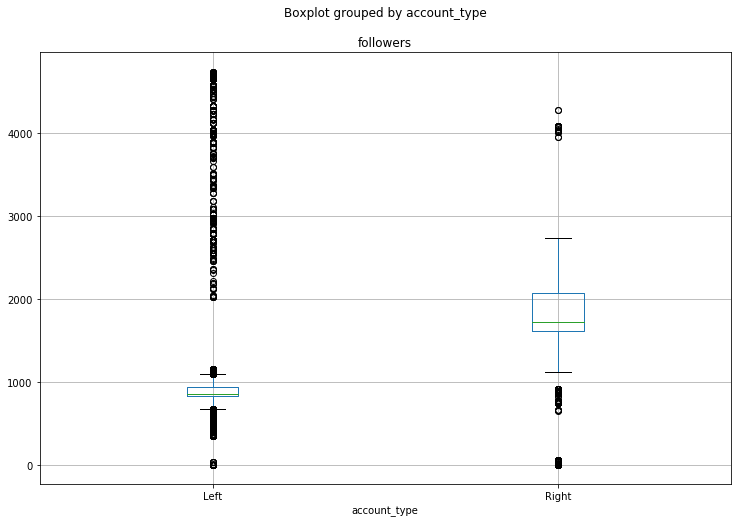

In [33]:
account_type_followers.boxplot('followers', by='account_type', figsize=(12, 8))

We can observe that most accounts (understandably) didn't have many followers. Regardless of account type, most followers were clustered at a very low amount. However, there appear to be huge outliers in both groups, where some accounts on the left had nearly 60,000 followers, and on the right, even over 140,000 followers. This already suggests that there isn't a strong (if even weak) correlation between account_type and number of followers, but it does show that Russia's right-leaning accounts had more cases of extreme outliers (which is a success for them).

['n: 24667', 'n: 23280']


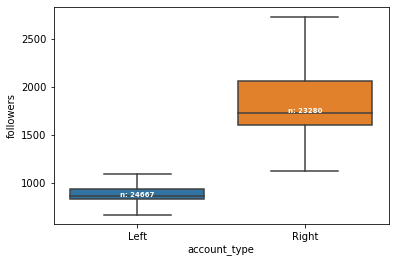

In [34]:
# Plot boxplot
boxplot_withnum(account_type_followers,x='account_type',y='followers')

This second box plot represents a zoom-up of the lower and upper quartile ranges seen in the first graph, and excludes the extreme outliers. We can observe at higher level here that most rightist accounts had 2,000-3,000 followers, while leftists accounts all had around 1,000 followers. 

Non-statistically, we can consider this *midly* significant: Experience with popularity on Twitter is enough to know that accounts between 1,000-5,000 followers aren't actually that different, and actually have similar outreach overall. Additionally, 1,000-5,000 means each tweet likely got several hundred people who *saw* the tweet at best. If we assume a minor percentage of people actually were *swayed* by the Tweet, then we can conclude that this difference in folloers is relatively minor.

To see if there is a statistically significant difference between the two groups, we ran a one-way ANOVA test to see if the results between groups are significant. As observed below, they are not.

In [35]:
oneway_anova(account_type_followers, 'account_type', 'followers')

                    sum_sq       df             F  PR(>F)
account_type  9.879798e+09      1.0  58253.643981     0.0
Residual      8.131455e+09  47945.0           NaN     NaN


Even if the data above showed a lack of correlation, we did observe extreme outliers in both groups. In an influence campaign, we surmised that even a low amount of extreme outliers could be considered a success for Russian groups - as long as the few accounts that went viral passed on their message.

Thus, we want to take a closer look at the outliers which had followers greater than the mean + 2x the standard deviation of followers. We will, once again, plot this on a boxplot:

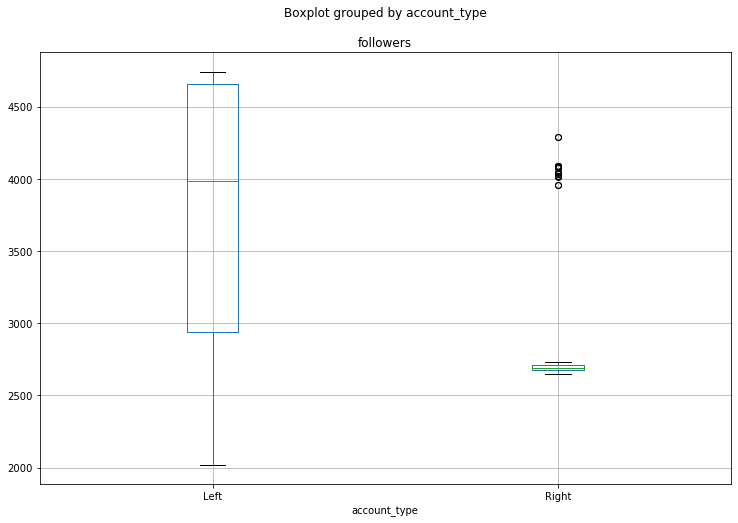

In [36]:
account_type_followers_high = get_high_outliers_lr(account_type_followers, 'account_type', 'followers')
account_type_followers_high.boxplot('followers', by='account_type', figsize=(12, 8))

Perhaps a little more interesting, was that we can observe outlier accounts in Leftist Russian accounts tended to have around 30,000 followers, while right-leaning accounts had around 45,000 (a relatively small amount more). However, the upper quartiles in the right account were still 3-5x greater than leftist accounts. 

We can find somewhat of a minor correlation from this with respect to account type - as mentioned above, outlier accounts that went viral did generally have a "range" they fell into.

['n: 2950', 'n: 426']


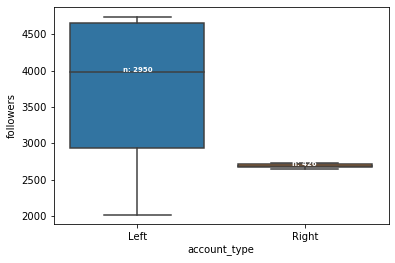

In [37]:
boxplot_withnum(account_type_followers_high,x='account_type',y='followers')

In [38]:
oneway_anova(account_type_followers_high, 'account_type', 'followers')

                    sum_sq      df            F  PR(>F)
account_type  4.093304e+08     1.0  3978.764657     0.0
Residual      3.471130e+08  3374.0          NaN     NaN


We also compared these two groups with a one-way ANOVA test. The results of the test suggest there is a statistically significant difference in the **outlier** groups, meaning at least for outliers, right-leaning account types tended to have more followers.

### Analyze filtered outliers

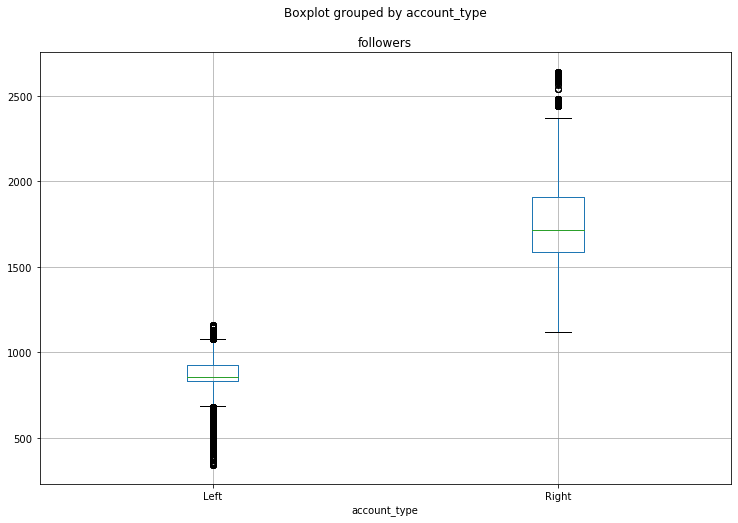

In [39]:
account_type_followers_filtered = filter_outliers_lr(account_type_followers, 'account_type', 'followers')
account_type_followers_filtered.boxplot('followers', by='account_type', figsize=(12, 8))

['n: 22830', 'n: 21492']


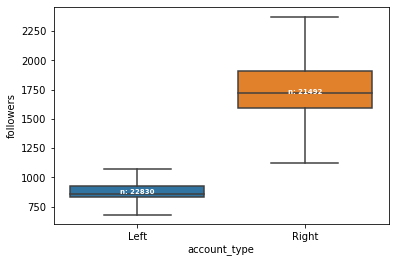

In [40]:
boxplot_withnum(account_type_followers_filtered,x='account_type',y='followers')

Once again, we can take a closer look at the upper and lower quandrants themselves. Within the outliers, we can observe a bit more of a difference - rightist accounts on average had about 1,000 more followers (in the outlier pool).

One observation we can make from both this plot and the overall plot from just before this is that the variance is a lot higher for rightest accounts. This may be supportive of the findings between left/right from earlier - leftist accounts had a bit more of a specialization: Sowing discord, or even convincing people on the edge, while rightest accounts just wanted to mass unite (spamming topics like #Trump) and fear-monger. The more focused concentrations of followers as seen in our graphs may be representative of that - focused accounts will tend to have less followers, while larger, more spammy accounts (not unlike Instagram meme accounts) will tend to have more followers.

In [41]:
oneway_anova(account_type_followers_filtered, 'account_type', 'followers')

                    sum_sq       df              F  PR(>F)
account_type  8.079311e+09      1.0  228729.733457     0.0
Residual      1.565494e+09  44320.0            NaN     NaN


#### Analyze Correlation between updates count and account_type (specifically Left or Right)

Continuing on, we want observe whether Leftist and/or Rightist accounts had correlations with any kind of "updates" (i.e., the number of likes and retweets on their tweets). 

In [42]:
left_right = tweets_2016_2017[(tweets_2016_2017['account_type']=='Left') | (tweets_2016_2017['account_type']=='Right')]
account_type_updates = left_right[['updates','account_type']]
account_type_updates.head()

,updates,account_type
publish_date,,
2016-10-02 18:04:00,1456,Left
2016-10-02 18:04:00,1457,Left
2016-10-02 18:40:00,1460,Left
2016-10-02 18:40:00,1462,Left
2016-10-02 18:40:00,1460,Left


Once again, we will select a subset of our overall data that only has tweets where accounts or leftist or rightest, and then reduce that down again to only the 'updates' and 'account_type' columns:

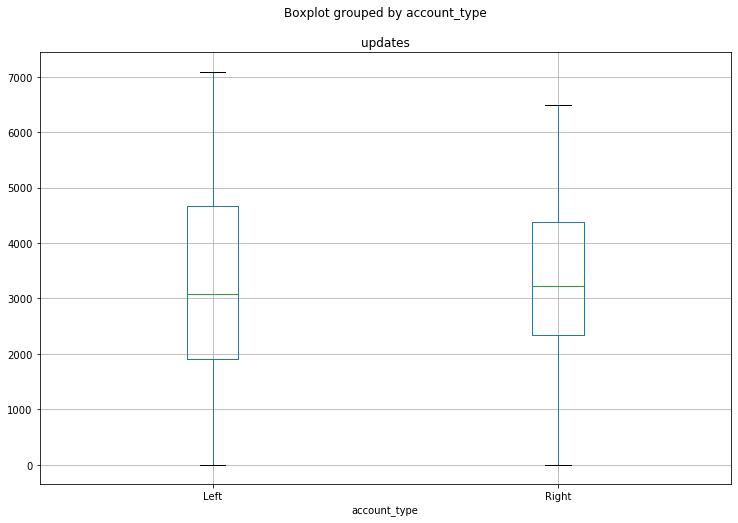

In [43]:
account_type_updates.boxplot('updates', by='account_type', figsize=(12, 8))

From the graph, we can see that unlike the other graphs, both account types had actually a lot of overlap in their lower and upper quartiles this time. Leftist and rightist accounts both tended to have around 2500-5000 updates, while the upper quadrant of rightest accounts tended to have a little bit more, between 7500 to 10,000 updates. This further supports our hypothesis and observation from earlier about rightist accounts being more about spreading mass information/propaganda, and leftist accounts focusing on more specific issues. This is further supported by the range of the outliers - once again, right-leaning tweets had much more mass spread than left-leaning accounts. 

['n: 24667', 'n: 23280']


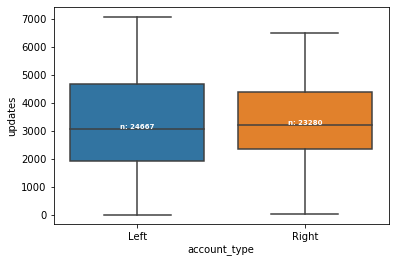

In [44]:
boxplot_withnum(account_type_updates,x='account_type',y='updates')

What was mildly surprising that we found here was that there actually didn't tend to be a more popular category. The large majority of Tweets on either side actually were almost about as equally popular as each other.

However, this information may be more for naut - on Twitter, it only takes individual tweets to go viral that really have an effect for manipulation. We can see that right leaning tweet outliers were successful in producing tweets that went massively viral, with over 150,000 updates. We will look into that with more detail in the following section.

Before that, however, we once again want to also run another ANOVA test to compare these two groups:

In [45]:
oneway_anova(account_type_updates, 'account_type', 'updates')

                    sum_sq       df         F        PR(>F)
account_type  9.229689e+07      1.0  42.97309  5.605954e-11
Residual      1.029755e+11  47945.0       NaN           NaN


We can observe that there is a statistically significant difference between the groups according to the ANOVA. This is expected, because we observed extreme outliers within the "Right" group. We look into that with more detail now:

##### Analyze filtered outliers between account_type and update count

We want to filter down the tweets to just the ones considered "outliers". Once we do that, we will plot the data in a boxplot again.

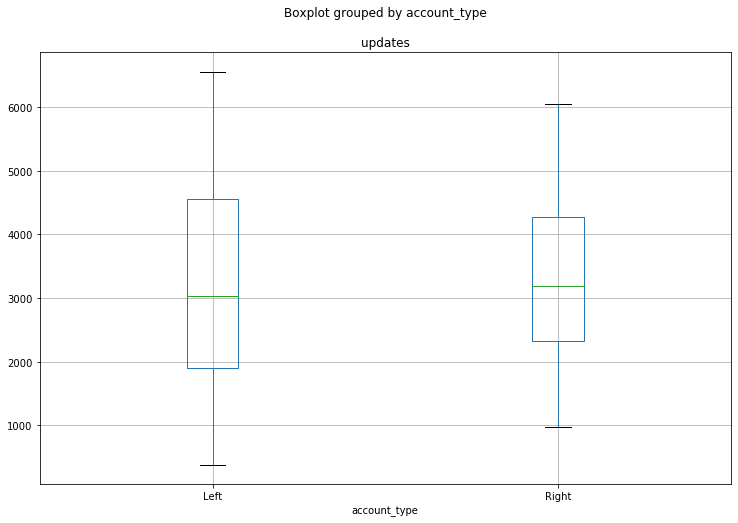

In [46]:
account_type_updates_filtered = filter_outliers_lr(account_type_updates, 'account_type', 'updates')
account_type_updates_filtered.boxplot('updates', by='account_type', figsize=(12, 8))

['n: 23958', 'n: 22807']


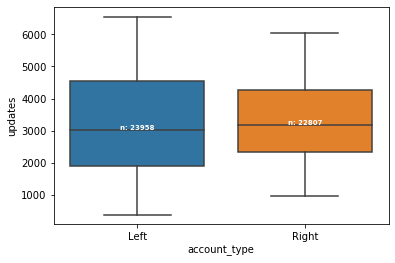

In [47]:
boxplot_withnum(account_type_updates_filtered,x='account_type',y='updates')

Within the outlier tweets, Leftist accounts generally stayed within a specific range. However, Rightest tweets had a greater range of updates, and even within these outlier tweets there were also strong outliers that received much more updates than ALL other tweets.

This suggests to us that Leftist tweets had a tendency to hit within a specific range, even the outliers, while Rightest tweets had much higher variance. Similarly however, this could still be considered a win for Russia's right leaning tweets - they had a higher number of tweets go massively viral, which can pass their message on effectively.

In [48]:
oneway_anova(account_type_updates_filtered, 'account_type', 'updates')

                    sum_sq       df          F        PR(>F)
account_type  9.018440e+07      1.0  46.220832  1.069127e-11
Residual      9.124226e+10  46763.0        NaN           NaN


#### Analyze correlation between followers and tweet_type

Next up, we wanted to determine if the type of content Russian accounts propagated (whether they made new content, retweeted content, or quoted content) had any correlation between the number of followers those accounts had.

We'll be following the same approach as with the other sections, by plotting the results to a boxplot.

In [49]:
tweets_2016_2017['post_type'] = tweets_2016_2017['post_type'].str.lower()
tweets_2016_2017['post_type'].replace(np.nan, 'new', inplace=True)
tweet_type_followers = tweets_2016_2017[['followers','post_type']]

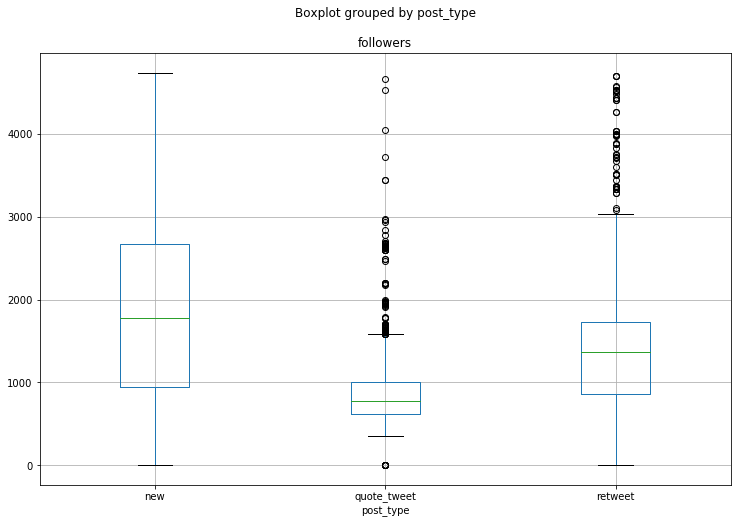

In [50]:
tweet_type_followers.boxplot('followers', by='post_type', figsize=(12, 8))

['n: 45318', 'n: 2084', 'n: 545']


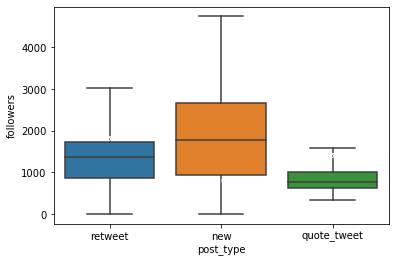

In [51]:
boxplot_withnum(tweet_type_followers,x='post_type',y='followers')

Immediately, we can observe that the accounts that tended to have more popular were overwhelmingly generating new content. The range between the lower and the upper quartile for accounts that posted more new tweets ranged between around low hundreds to 18,000, while the same quartiles for retweets and quotes both were around low hundreds to low thousands.

We will not perform an outlier analysis on this section because the data provided is slightly misleading - it is impossible for anything but new tweets to go viral, because they're the only new content. Retweets and quote tweets count back towards new content.

In [52]:
oneway_anova(tweet_type_followers, 'post_type', 'followers')

                 sum_sq       df           F  PR(>F)
post_type  7.086165e+08      2.0  981.755251     0.0
Residual   1.730264e+10  47944.0         NaN     NaN


## Analyze correlation between updates and tweet_types

#### Analyze correlation between updates and tweet_types

Here we wanted to determine if the type of content regular users gave updates to were new made content, retweeted content, or quoted content.

In [53]:
tweet_type_updates = tweets_2016_2017[['updates','post_type']]

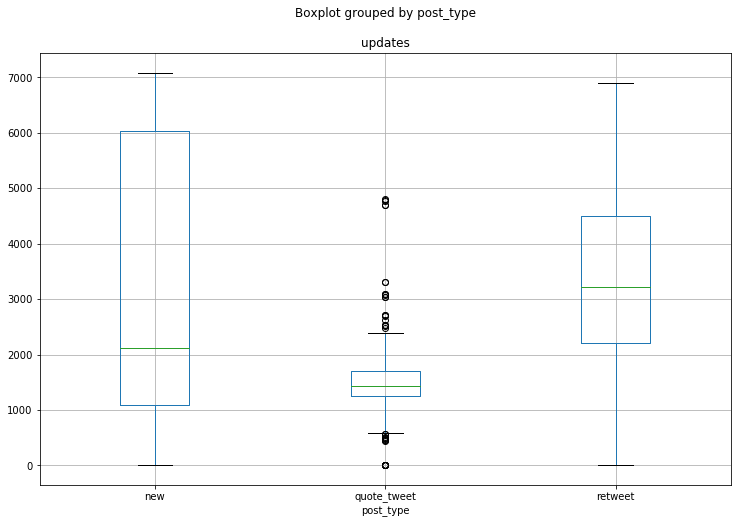

In [54]:
tweet_type_updates.boxplot('updates', by='post_type', figsize=(12, 8))

Unsurprisingly, new tweets tended to generate the most traction - which, by the nature of their design, they should have. What was a bit more intersting to see what was that the bots were evidently capable of quoting each other - because quoted tweets also gained a similar amount of updates on average (though the outliers didn't match new tweets).

What was mildly interesting to observe was that there was a large volume of retweets that also had updates. This isn't really conclusive of anything, but it suggests that the bots were retweeting each other (or other tweets, such as Donald Trump's), beyond our original imagined capability of just tweet generation - which means Russia's bot network was designed to promote itself.

['n: 45318', 'n: 2084', 'n: 545']


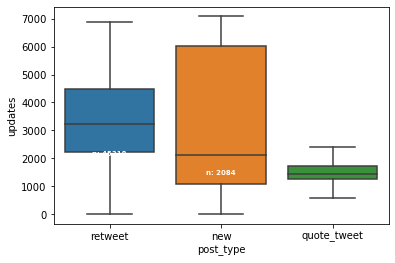

In [55]:
boxplot_withnum(tweet_type_updates,x='post_type',y='updates')

In [56]:
oneway_anova(tweet_type_updates, 'post_type', 'updates')

                 sum_sq       df           F         PR(>F)
post_type  2.225461e+09      2.0  529.031325  5.535104e-228
Residual   1.008423e+11  47944.0         NaN            NaN


Depicted here we can see that for the most part it would seem all forms of updated get coverage however new content updates is clearly the one with the biggest activity. This can pehaps be due to the fact that, like mentioned above, activity in regards to retweet and quoted tweet can funnel right back into new content update amount. 

#### Analyze filtered outliers

Here we wanted to perform similar analysis as above but this time focused on the outliers we discussed earlier. 

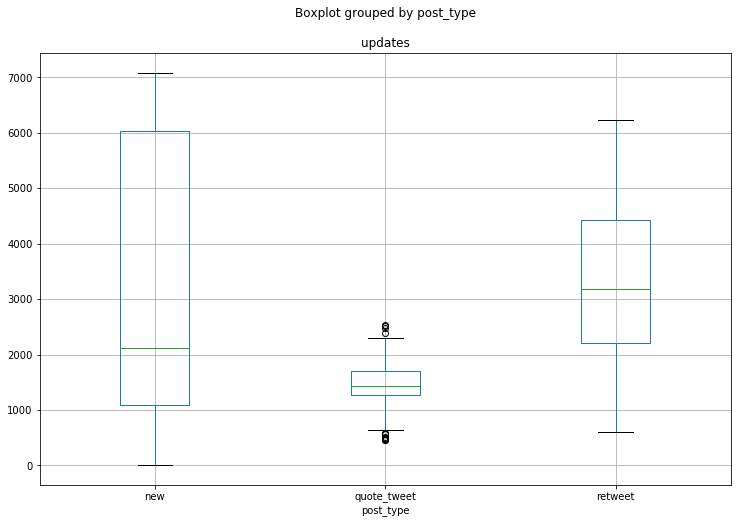

In [57]:
tweet_type_updates_filtered = filter_outliers_tweet_type(tweet_type_updates, 'updates')
tweet_type_updates_filtered.boxplot('updates', by='post_type', figsize=(12, 8))

['n: 44392', 'n: 2084', 'n: 520']


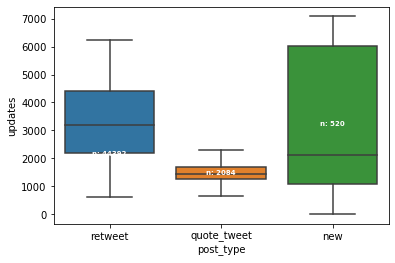

In [58]:
boxplot_withnum(tweet_type_updates_filtered,x='post_type',y='updates')

In [59]:
oneway_anova(tweet_type_updates_filtered, 'post_type', 'updates')

                 sum_sq       df           F         PR(>F)
post_type  2.046490e+09      2.0  523.780372  1.055437e-225
Residual   9.180443e+10  46993.0         NaN            NaN


## Analyze correlation between followers and tweet_length

In the following we wanted to discover the methods used by these accounts or rather the rules that govern their activity. We chose to look at tweet length. The reason for this is the same reason why we get annoyed at unskippable ads, time. Nobody wants to sit there and read an entire paragraph, they want to read quick statements that have big impacts. 

Text(0, 0.5, 'followers')

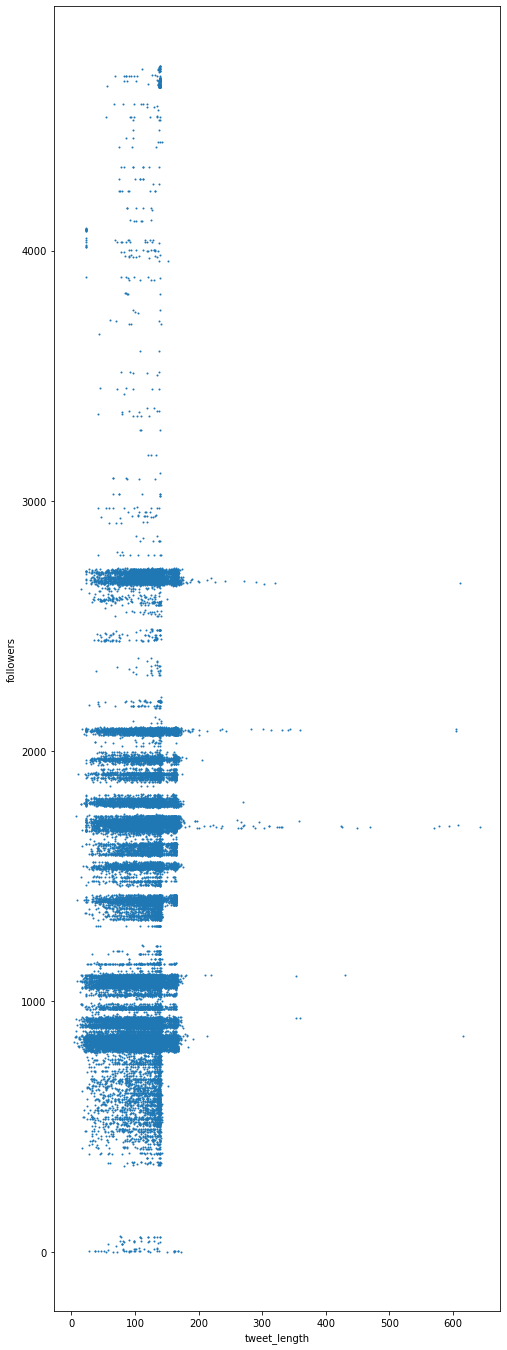

In [60]:
#plot followers against tweet length
tweets_2016_2017['tweet_length'] = tweets_2016_2017['content'].str.len()
fig, ax = plt.subplots(1,1,figsize=(8, 24))
ax.scatter(tweets_2016_2017['tweet_length'], tweets_2016_2017['followers'], s=1)
ax.set_xlabel('tweet_length')
ax.set_ylabel('followers')

In [61]:
#compute relationship between tweet length and updates
outcome, predictors = patsy.dmatrices('followers ~ tweet_length', tweets_2016_2017)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     965.1
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          8.53e-210
Time:                        11:18:21   Log-Likelihood:            -3.7529e+05
No. Observations:               47947   AIC:                         7.506e+05
Df Residuals:                   47945   BIC:                         7.506e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1129.3656      9.231    122.350   

While we expected to see some sort of trend, knowing that these bots would have governing rules they follow, we did not expect to see such an obvious vertical trend within the data. This showcases that new impactful content with less than 200 characters was the key form of communnication.

## Analyze correlation between followers and tweet_length with popular words

Now knowing what kind of parameters Russian bots tended to followed, we wanted to take a closer look at the subject matter of the tweet content. We selected the top 50 most popular words that appeared in all of the 2016_2017 tweets, w(hich were "trump", "black", "people", etc...), and then for each word, we plotted every single tweet that contained the word's content length and follower count to see if specific topics may have been more viral in "reaching" or "getting the message" to its intended audience - and resulting in a follow.

In [62]:
# Find popular words
counts = word_freq(tweets_2016_2017)

In [63]:
for w in filler_words:
    del counts[w]
counts.most_common(50)

[('trump', 2969),
 ('people', 1365),
 ('black', 1213),
 ('hillary', 1143),
 ('#maga', 1078),
 ('obama', 1023),
 ('�', 1019),
 ('clinton', 949),
 ('white', 869),
 ('#tcot', 851),
 ('news', 842),
 ('time', 827),
 ('#pjnet', 797),
 ('make', 766),
 ('go', 707),
 ('good', 684),
 ('post:', 678),
 ('love', 645),
 ('had', 609),
 ('media', 606),
 ('did', 594),
 ('think', 583),
 ('vote', 582),
 ('president', 579),
 ('great', 575),
 ('@realdonaldtrump', 563),
 ('right', 554),
 ('��', 545),
 ('man', 537),
 ('going', 529),
 ('against', 529),
 ('american', 528),
 ('take', 527),
 ('america', 522),
 ('police', 520),
 ('back', 520),
 ('u', 518),
 ('4', 512),
 ('music', 504),
 ('donald', 500),
 ('\\|', 495),
 ('stop', 484),
 ('first', 477),
 ('every', 473),
 ('even', 467),
 ('video', 451),
 ('mt', 447),
 ('support', 440),
 ('best', 440),
 ('#trump', 433)]

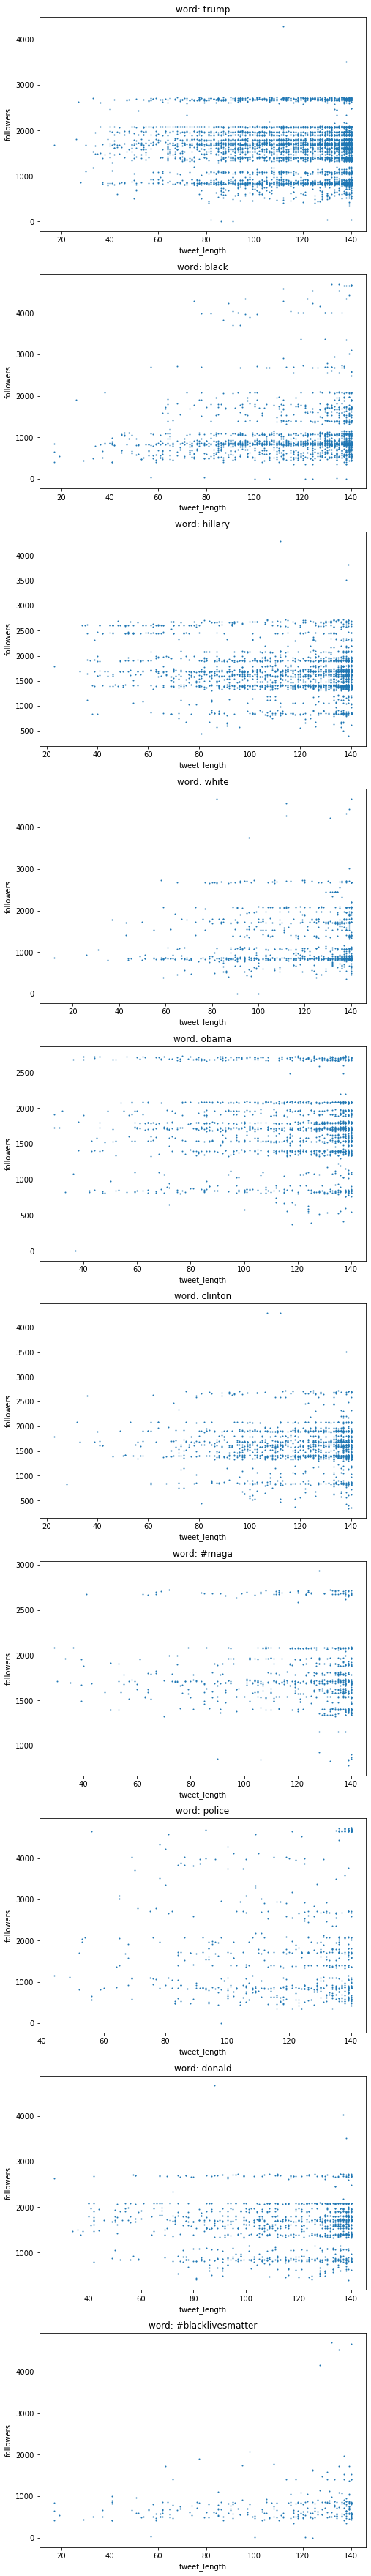

In [77]:
#manually select popular words from above
top=['trump','black','hillary','white', 'obama', 'clinton', '#maga', 'police', 'donald', '#blacklivesmatter']
fig, ax = plt.subplots(10,1,figsize=(8, 24))
fig.subplots_adjust(bottom=1,top=3)
for i,w in enumerate(top):
    subset = tweets_2016_2017[(tweets_2016_2017['content'].str.contains(w)) & (tweets_2016_2017['tweet_length']<=140)]
    ax[i].scatter(subset['tweet_length'], subset['followers'], s=1)
    ax[i].set_xlabel('tweet_length')
    ax[i].set_ylabel('followers')
    ax[i].set_title("word: {}".format(w))

Overall, there does not appear to be too much correlation between content length and follower count, with respect to each hot topic. There was constantly a large bubble of scattered data in the upper-ranges of followers count that would cause any regression line to be not very linear. However, we **can** observe that excluding the more outlier-follower counts, there is somewhat of an increasing linear relationship where the data is most clustered - usuall between the 0 to 10,000 follower count, occasionally 20,000.

To statisically verify any linear relationship (or lack thereof), we will print OLS regression results for each word. The metric that is important is the R-squared value. A level of R-squared that is close to 0 indicates a lack of a linear relationship.

In [78]:
for i,w in enumerate(top):
    subset = tweets_2016_2017[(tweets_2016_2017['content'].str.contains(w)) & (tweets_2016_2017['tweet_length']<=140)]
    
    outcome, predictors = patsy.dmatrices('followers ~ tweet_length', subset)
    mod = sm.OLS(outcome, predictors)
    res = mod.fit()
    print("\n\nword: {}".format(w))
    print(res.summary())



word: trump
                            OLS Regression Results                            
Dep. Variable:              followers   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.96
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           0.000549
Time:                        11:37:58   Log-Likelihood:                -38280.
No. Observations:                4961   AIC:                         7.656e+04
Df Residuals:                    4959   BIC:                         7.658e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1740.8094     37.455

As expected, there as no strong linear correlation between each word's content length per tweet vs followers. This suggests that the spread of information across Twitter was more reliant on how each message was spread, as opposed to what was spread.

## Analyze correlation between updates and tweet_length

Similar to what was shown above, we see this same vertical trend carry over to update length. Only difference here is that there are more outliers. Our assumption for this was perhaps retweeting of messages made by actual real users which do not tend to be so concise. 

Text(0, 0.5, 'updates')

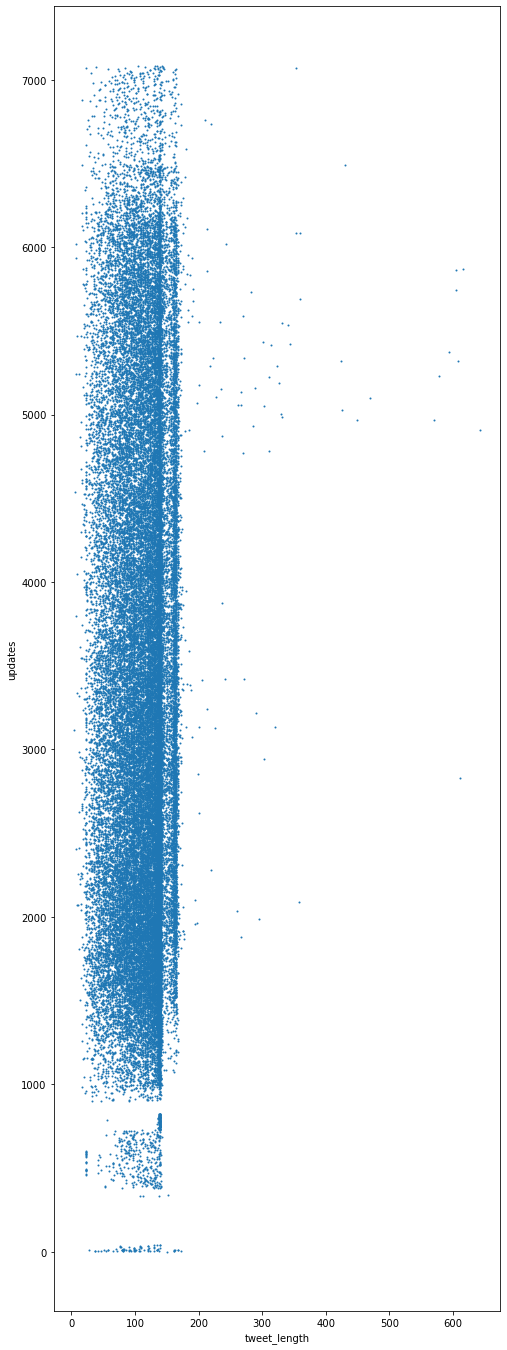

In [79]:
#plot followers against tweet length
tweets_2016_2017['tweet_length'] = tweets_2016_2017['content'].str.len()
fig, ax = plt.subplots(1,1,figsize=(8, 24))
ax.scatter(tweets_2016_2017['tweet_length'], tweets_2016_2017['updates'], s=1)
ax.set_xlabel('tweet_length')
ax.set_ylabel('updates')

In [80]:
#compute relationship between tweet length and updates
outcome, predictors = patsy.dmatrices('updates ~ tweet_length', tweets_2016_2017)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                updates   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.00
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           0.000108
Time:                        11:38:10   Log-Likelihood:            -4.1758e+05
No. Observations:               47947   AIC:                         8.352e+05
Df Residuals:                   47945   BIC:                         8.352e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3289.8742     22.299    147.537   

Once again, there was no strong relationship between tweet length and update account. The popularity of each tweet was pretty similar regardless of what length - so the length of the content isn't really popular, and as we saw earlier neither was the specific subject matters. This indicates a very strong reliance on how topics were propagated, instead of what exactly was.

## Analyze correlation between followers and tweet_length with popular words

With this final section we wanted to analyze update amount with respect to the length of tweets involving different subjects and found that the trend continued and that these bots were in fact following rules when it came to both content creation and content passed on. 

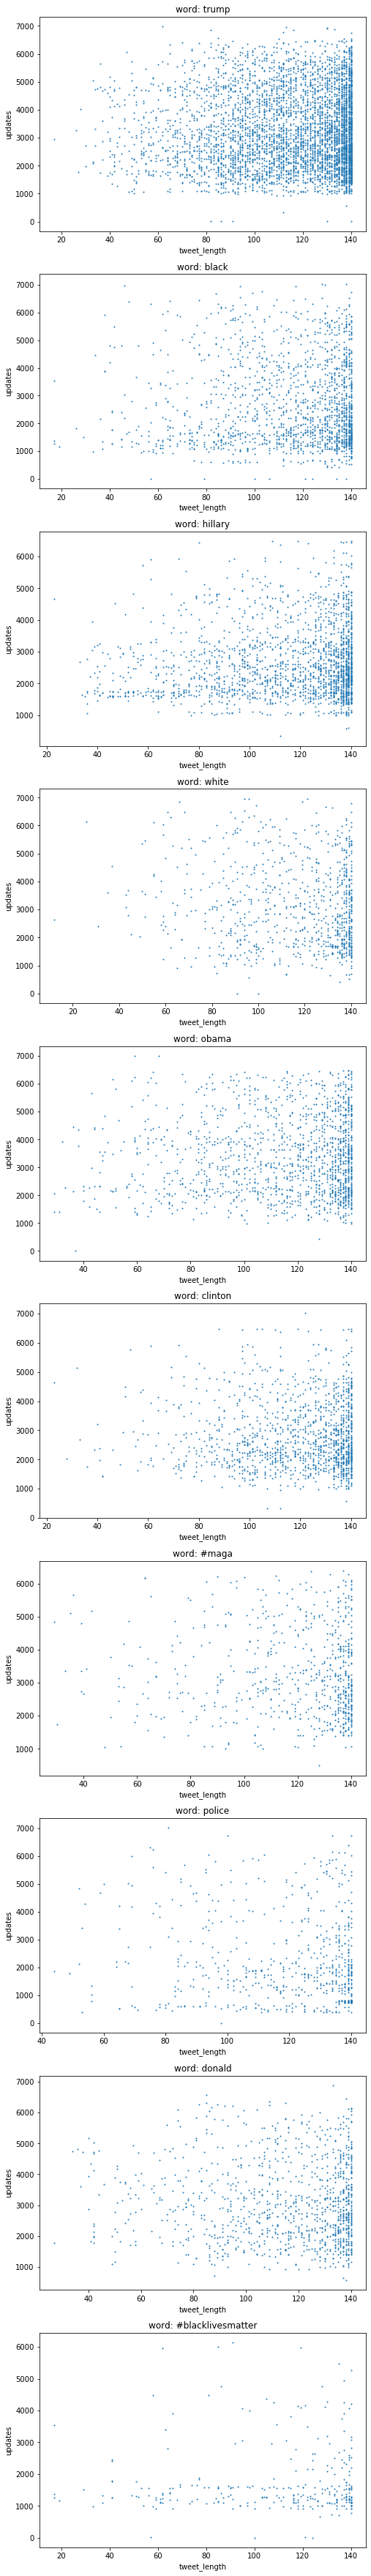

In [83]:
tweets_2016_2017['tweet_length'] = tweets_2016_2017['content'].str.len()
fig, ax = plt.subplots(10,1,figsize=(8, 24))
fig.subplots_adjust(bottom=1, top=3)
for i,w in enumerate(top):
    subset = tweets_2016_2017[(tweets_2016_2017['content'].str.contains(w)) & (tweets_2016_2017['tweet_length']<=140)]
    ax[i].scatter(subset['tweet_length'], subset['updates'], s=1)
    ax[i].set_title("word: {}".format(w))
    ax[i].set_xlabel('tweet_length')
    ax[i].set_ylabel('updates')

We'll run Pasty OLS regression results again to give us a mathematical view to determine whether or not there was any particularly strong correlation, if at all:

In [84]:
for i,w in enumerate(top):
    subset = tweets_2016_2017[(tweets_2016_2017['content'].str.contains(w)) & (tweets_2016_2017['tweet_length']<=140)]
    
    outcome, predictors = patsy.dmatrices('updates ~ tweet_length', subset)
    mod = sm.OLS(outcome, predictors)
    res = mod.fit()
    print("\n\nword: {}".format(w))
    print(res.summary())



word: trump
                            OLS Regression Results                            
Dep. Variable:                updates   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06962
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.792
Time:                        11:38:55   Log-Likelihood:                -42725.
No. Observations:                4961   AIC:                         8.545e+04
Df Residuals:                    4959   BIC:                         8.547e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3214.3737     91.755

We can see again that for each word, there was no strong linear correlation at all between tweet length and update count.

# Predicting Political Leanings with NLP

## Introduction

Finally, with this data, and just for fun, we can train a linear classifier with SGD methods and teach it how to classify the political leanings of provided Tweets. For the purposes of this assignment, we will train a SGDClassifier to be able to differentiate between Left and Right leaning tweets only.

## Setup

We first install dependencies and import modules used to train our NLP model.

In [85]:
! pip install --user nltk

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import collections
import numpy as np

In [87]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [88]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Preparing Training Data

Because we will only be classifying between left or right political sides, we first will select only Left or Right leaning tweets (as classified by the 'account_type'). We'll also make sure of this with an assert.

In [89]:
# Use this box to test subsets of training data if necessary
#tweets_2016_2017 = pd.read_csv('./data/IRAhandle_tweets_1.csv')

In [90]:
tweets_2016_2017_lr = tweets_2016_2017[(tweets_2016_2017['account_type']=='Left') | (tweets_2016_2017['account_type']=='Right')]

In [91]:
# A quick way for us to make sure to some light degree our data is properly cleaned
assert(sorted(set(tweets_2016_2017_lr['account_type'])) == ["Left", "Right"])

## Label Matrix Representations

In our matrix, we need to assign values to our groups. We assign 0.0 for "Right" and 1.0 for "Left" account_types"

In [92]:
def convert_label(label):
    if label == "Right": return 0.0
    elif label == "Left": return 1.0
    else: return label

For future use, we also want to define a function that does it the other way around:

In [93]:
def convert_number(num):
    if num == 0.0: return "Right"
    elif num == 1.0: return "Left"
    else: return num

And then now, we use the convert_label() function and apply it to our english_tweets dataframe.

In [94]:
tweets_2016_2017_lr['y'] = tweets_2016_2017_lr['account_type'].apply(convert_label)

In [95]:
# Once again, make sure we're doing things right - this is useful for quick validations
assert(sorted(set(tweets_2016_2017_lr['y'])) == [0., 1.])

## Vectorizing Our Data

We will vectorize our data using the TF-IDF method. Our SGDClassifier will be trained using these vectors. 

A hardware limitation we encountered was that our hardware devices aren't really capable of transforming more than about 20,000 tweets at any given time. Thus, we will batch-train the SGDClassifier by using 2000 TF-IDF fit-transformed data which uses random samples of size 20,000.

In [96]:
# Create our SVC that we will batch-train
clf = SGDClassifier()

In [97]:
# Create the TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer="word", 
                             tokenizer=word_tokenize, 
                             stop_words=stopwords.words('english'))

# Training the SGDClassifier

### Fitting the Data
Batch-train the SGDClassifier with `partial_fit()` by passing in 2,000 random samples from our Tweets.

In [98]:
for i in range(2000):
    # Train using sample sizes of 20,000
    data = tweets_2016_2017_lr.sample(20000)
    et_x = vectorizer.fit_transform(data['content']).toarray()
    et_y = data['y']
    # Once we have this sample data transformed and fitted into the vectorizer, train CLF with it
    # Note: vectorizer.fit_transform() will change [vocab] shape each time cause fit_transform(), this is okay
    clf.partial_fit(et_x, et_y, classes=np.unique(et_y))

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


### How Accurate Are We?

Let's fetch a random sample of 20,000 tweets (doesn't have to be 20,000), and run an analysis on how accurate the SGDClassifier is:

TODO: This isn't really accurate right now because we've only done 1 iteration on a small set, but once it's integrated into the master code it'll be different.

In [ ]:
# Let's see how accurate (or inaccurate this is)

test_data = tweets_2016_2017_lr.sample(20000)
test_data_vector = vectorizer.transform(test_data['content']).toarray()
test_data_y = test_data['y']

results = clf.predict(test_data_vector)
print(classification_report(test_data_y, results))

### Testing Your Own Sentence

We define a function that allows anyone to test their own input sentence:

In [ ]:
def find_leaning(content):
    vectorized = vectorizer.transform(pd.Series([content])).toarray()
    result = clf.predict(vectorized)
    return convert_number(result[0])

You can use this method in any box below. Have it in the form of:

```python3
find_leaning("whatever you want to try")
```

For example:

In [ ]:
find_leaning("Black lives matter!")

## 4. Privacy/Ethics Considerations

All of the tweets analyzed are sourced from fivethirtyeight.com. They were originally presented to Congress and subsequently released for public usage as a full disclosure for users of Twitter and consumers of popular news. In considering the ethicality of the topics discussed, these are public trending topics that are being discussed globally; moreover, on a personal level, these are topics that are important to be involved in and well informed on what is being implemented. 

The question we are asking in seeing what these bots are most likely to discuss does not bring up any ethical concerns, but rather attempts to recognize and identify the unethical use of publicly available technology. With the analysis of this data we aim to shed light on the realities of global propaganda and politics, as well as the power social media induces over public opinion.

One minor ethical concern that we raised with this data is that the tweets deal largely with content that is extremely polarizing. While we did not focus strongly on the actual tweet *content* - as opposed to quantative variables associated with the tweets -, we need to consider that the Tweets themselves could contain questionable or triggering content.

Finally, a minor concern is that we will never be fully confident if the information we have is truly a representative sample of all of Russian tweet data that exists on Twitter. It is extremely hard to identify this kind of behavior, which we can attest to at a personal level - two of the members in our group have been employed by a company whose platform was also used in mass misinformation campaigns -, so we are not fully confident our sample data only has standard sampling error, as opposed to completely misrepresenting a much larger picture.

## 5. Conclusion and Discussion

As predicted the data clearly shows that Russian Twitter bots exhibit calculated behavior, discussing hot topics when they are most popular. This we believe is in an attempt to sway the public's opinions. We could see evidence for this by how much activity some accounts from both the leftist and rightist standpoints received.

We first predicted that words such as “Trump” or “Hilary” would occur in higher frequency and as seen from the data above, these words were among the top 5 words used by these bots. The reason we believed this would be the case, is due to the fact that the elected U.S. presidential candidate actually has an effect on much of the world outside of the U.S. due to our many ties. This would as a result be a strong target for Russian Twitter bots to attempt to persuade others around. 

When starting this project we believed these bots would be in constant discussion about many issues with respect to the overall timeline. We expected that we would find subject popularity heavily dependent on time. An example of this would be a large amount of discussions in reference to “Mass shootings” however this was not the case. Perhaps this was not the case due to this issue mostly being a U.S. issue. For reference, Presidential debates and race debates can have an effect on the world, but the debate as to whether we get the ability to buy assault rifles or not is a U.S. issue alone. This perhaps was the reason why we did not see much discussion in regards to these topics.

One aspect of this project we were very eager to analyze was the possible influence these Russian Twitter bot accounts could hold. This proved to be more challenging than we initially thought due to how popularity on Twitter works. We visualized outlier accounts that had a high number of followers and found that the best method for success as a bot was the ability to generate new content based around their intended message. This was the case for both right and left sided accounts however, troubles arose when looking deeper at what it means to be popular. Accounts on twitter can have many followers yet get little to no updates (nobody looks at their page), while some others can have little to no followers and have tweets blow up and get a huge amount of attention. Because of this discrepancy it was hard to really quantify or showcase the influence Bot accounts had on the public because there are many variables that go into the success or failure of these accounts. What we were happy to find though were direct correlations between the russian twitter bot accounts details (updates, activity, consistency, etc) with respect to subject terms embedded in tweets. We could see through graphs and visualizations just how lefist and rightist accounts grew in fame.

Further research in this topic can include discussion on what inteded goals are and how popular accounts are being used to spread messages as compared to less popular accounts.